## Reading Data

In [1]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(gridExtra) 
library(GGally)
library(broom)
library(AER)
library(repr)
options(repr.plot.width = 15, repr.plot.height = 12)
git_data <- read_csv("repositories.csv")
head(git_data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Loading required package: lmtest

Loading required package: zoo


A

Name                       
1 freeCodeCamp               
2 free-programming-books     
3 awesome                    
4 996.ICU                    
5 coding-interview-university
6 public-apis                
  Description                                                                             
1 freeCodeCamp.org's open-source codebase and curriculum. Learn to code for free.         
2 :books: Freely available programming books                                              
3 😎 Awesome lists about all kinds of interesting topics                                  
4 Repo for counting stars and contributing. Press F to pay respect to glorious developers.
5 A complete computer science study plan to become a software engineer.                   
6 A collective list of free APIs                                                          
  URL                                                       Created At         
1 https://github.com/freeCodeCamp/freeCodeCamp              2014-12-24 17:49:19
2 https://github.com/EbookFoundation/free-programming-books 2013-10-11 06:50:37
3 https://github.com/sindresorhus/awesome                   2014-07-11 13:42:37
4 https://github.com/996icu/996.ICU                         2019-03-26 07:31:14
5 https://github.com/jwasham/coding-interview-university    2016-06-06 02:34:12
6 https://github.com/public-apis/public-apis                2016-03-20 23:49:42
  Updated At          Homepage                                                 
1 2023-09-21 11:32:33 http://contribute.freecodecamp.org/                      
2 2023-09-21 11:09:25 https://ebookfoundation.github.io/free-programming-books/
3 2023-09-21 11:18:22 NA                                                       
4 2023-09-21 08:09:01 https://996.icu                                          
5 2023-09-21 10:54:48 NA                                                       
6 2023-09-21 11:22:06 http://public-apis.org                                   
  Size   Stars  Forks Issues ⋯ Has Issues Has Projects Has Downloads Has Wiki
1 387451 374074 33599   248  ⋯  TRUE       TRUE        TRUE          FALSE   
2  17087 298393 57194    46  ⋯  TRUE      FALSE        TRUE          FALSE   
3   1441 269997 26485    61  ⋯  TRUE      FALSE        TRUE          FALSE   
4 187799 267901 21497 16712  ⋯ FALSE      FALSE        TRUE          FALSE   
5  20998 265161 69434    56  ⋯  TRUE      FALSE        TRUE          FALSE   
6   5088 256615 29254   191  ⋯  TRUE      FALSE        TRUE          FALSE   
  Has Pages Has Discussions Is Fork Is Archived Is Template Default Branch
1  TRUE     FALSE           FALSE   FALSE       FALSE       main          
2  TRUE     FALSE           FALSE   FALSE       FALSE       main          
3  TRUE     FALSE           FALSE   FALSE       FALSE       main          
4 FALSE     FALSE           FALSE    TRUE       FALSE       master        
5 FALSE     FALSE           FALSE   FALSE       FALSE       main          
6 FALSE     FALSE           FALSE   FALSE       FALSE       master

## Data

The dataset we have been assigned to work with is "The Most Popular GitHub Repositories (Projects)".  This dataset contains a list of the Top 215k GitHub projects with over *167 stars*.  There are a total of 215k observations with 24 variables to choose from. Further explanations of the data's variables includes:

Categorical Variables:
- `Name`: The name of the GitHub repository
- `Description`: A brief textual description that summarizes the purpose or focus of the repository
- `URL`: The URL or web address that links to the GitHub repository, which is a unique identifier for the repository
- `Created At`: The date and time when the repository was initially created on GitHub, in ISO 8601 format
- `Updated At`: The date and time of the most recent update or modification to the repository, in ISO 8601 format
- `Homepage`: The URL to the homepage or landing page associated with the repository, providing additional information or resources
- `Language`: The primary programming language
- `Topics`:A list of topics or tags associated with the repository, helping users discover related projects and topics of interest
- `License`: Information about the software license using a license identifier
- `Has Issues`: A boolean value indicating whether the repository has an issue tracker enabled. In this case, it's true, meaning it has an issue tracker
- `Has Projects`: A boolean value indicating whether the repository uses GitHub Projects to manage and organize tasks and work items
- `Has Downloads`: A boolean value indicating whether the repository offers downloadable files or assets to users
- `Has Wiki`: A boolean value indicating whether the repository has an associated wiki with additional documentation and information
- `Has Pages`: 	A boolean value indicating whether the repository has GitHub Pages enabled, allowing the creation of a website associated with the repository
- `Has Discussions`: A boolean value indicating whether the repository has GitHub Discussions enabled, allowing community discussions and collaboration
- `Is Fork`: A boolean value indicating whether the repository is a fork of another repository. In this case, it's false, meaning it is not a fork
- `Is Archived`: A boolean value indicating whether the repository is archived. Archived repositories are typically read-only and are no longer actively maintained
- `Is Template`: A boolean value indicating whether the repository is set up as a template
- `Default Branch`: The name of the default branch

Numerical Variables:
- `Size`: The size of the repository in bytes, indicating the total storage space used by the repository's files and data
- `Stars`: The number of stars or likes that the repository has received from other GitHub users, indicating its popularity or interest
- `Issues`: The total number of open issues
- `Forks`: The number of times the repository has been forked by other GitHub users
- `Watchers`: The number of GitHub users who are "watching" or monitoring the repository for updates and changes

*Data Collection:*

The data was collected by using a search API (application programming interface); then the creator kept gathering GitHub projects and their attributes until they recieved all projects that had star ratings $\geq$ 167. 

## Question

**Updated (Included more Input variables in our MLR Question)**

The question we are interested in answering is:

~~Does the Programming Language and the Size of a Project Affect it's Star Rating?~~

**Given that a Project has Offerable Downloadable Files, uses GitHub Projects, and has an Associated Wiki, Can We Make a Model Which can Accurately Predict the Number of Stars a Github Project will Have?**

Relevant variables in this question:
- `Stars`: The number of stars or likes that the repository has received from other GitHub users, indicating its popularity or interest
- `Watchers`: The number of GitHub users who are "watching" or monitoring the repository for updates and changes
- `Forks`: The number of times the repository has been forked by other GitHub users
- `Size`: The size of the repository in bytes, indicating the total storage space used by the repository's files and data
- `Language`: The primary programming language
- `Has Projects`: A boolean value indicating whether the repository uses GitHub Projects to manage and organize tasks and work items
- `Has Downloads`: A boolean value indicating whether the repository offers downloadable files or assets to users
- `Has Wiki`: A boolean value indicating whether the repository has an associated wiki with additional documentation and information


We will be using `Stars` as the response variable; for the explanatory variable, we will be `Forks`, `Size`, `Language`, `Watchers`, `Has Downloads`, `Has Wiki` and `Has Downloads` as the input variables.

We will create a new variable: `projects_downloads_wiki` which will be true if and only if `Has Downloads`, `Has Wiki` and `Has Downloads` are true.  There we can filter out the projects which only have those variables True.

Additionally, we will only be exploring projects using the Programming Languages *Java*, *JavaScript*, and *TypeScript* for our model.

To limit our x and y axis, we will only be using that satisfies the following requirements:

- `Star` < 250
- 100 < `Size` < 250
- `Forks` < 75
- `Watchers` < 250

that way, our range can be contained and enamorus outliers will not drastically affect the sample.

Using a multiple linear regression model, we can explore/predict the relationship between the star value and the chosen input variables of a GitHub project.  From our respective values given using the model, we can then conduct hypothesis testing on our MLR model and discover whether there is a statiscally significant difference between the star rating of a project and our chosen input variables of a GitHub project.

This question is mainly focused on prediction as we are trying to create a model with our chosen input variables to discover which can accurately predict star ratings.


## Tidy Data and Wrangling

In [2]:
names(git_data)[16] <- paste("has_Projects")
names(git_data)[17] <- paste("has_Downloads")
names(git_data)[18] <- paste("has_Wiki")
names(git_data)[22] <- paste("is_Archived")

tidy_git_data <- git_data |>
    select(Size, Stars, Forks, Watchers, Language, has_Downloads, has_Wiki, has_Projects) |>
    mutate(projects_downloads_wiki = (has_Downloads & has_Projects & has_Wiki)) |>
    drop_na() |>
    select(-has_Downloads, -has_Projects, -has_Wiki) |>
    filter(projects_downloads_wiki != FALSE) |>
    filter(Language == "TypeScript" | Language == "JavaScript" | Language == "Java") |>
    filter(Stars < 250 & Size < 250 & Size > 100 & Forks < 75 & Watchers < 250)

head(tidy_git_data)

Size Stars Forks Watchers Language   projects_downloads_wiki
1 204  249   35    249      JavaScript TRUE                   
2 171  249    9    249      JavaScript TRUE                   
3 146  249   12    249      JavaScript TRUE                   
4 121  249   38    249      Java       TRUE                   
5 167  249    4    249      TypeScript TRUE                   
6 168  249   24    249      Java       TRUE

Our tidied dataset, contains the variables we are measuring and using for our prediction model.

## Data Visualization

### Exploring Multicollinearity

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


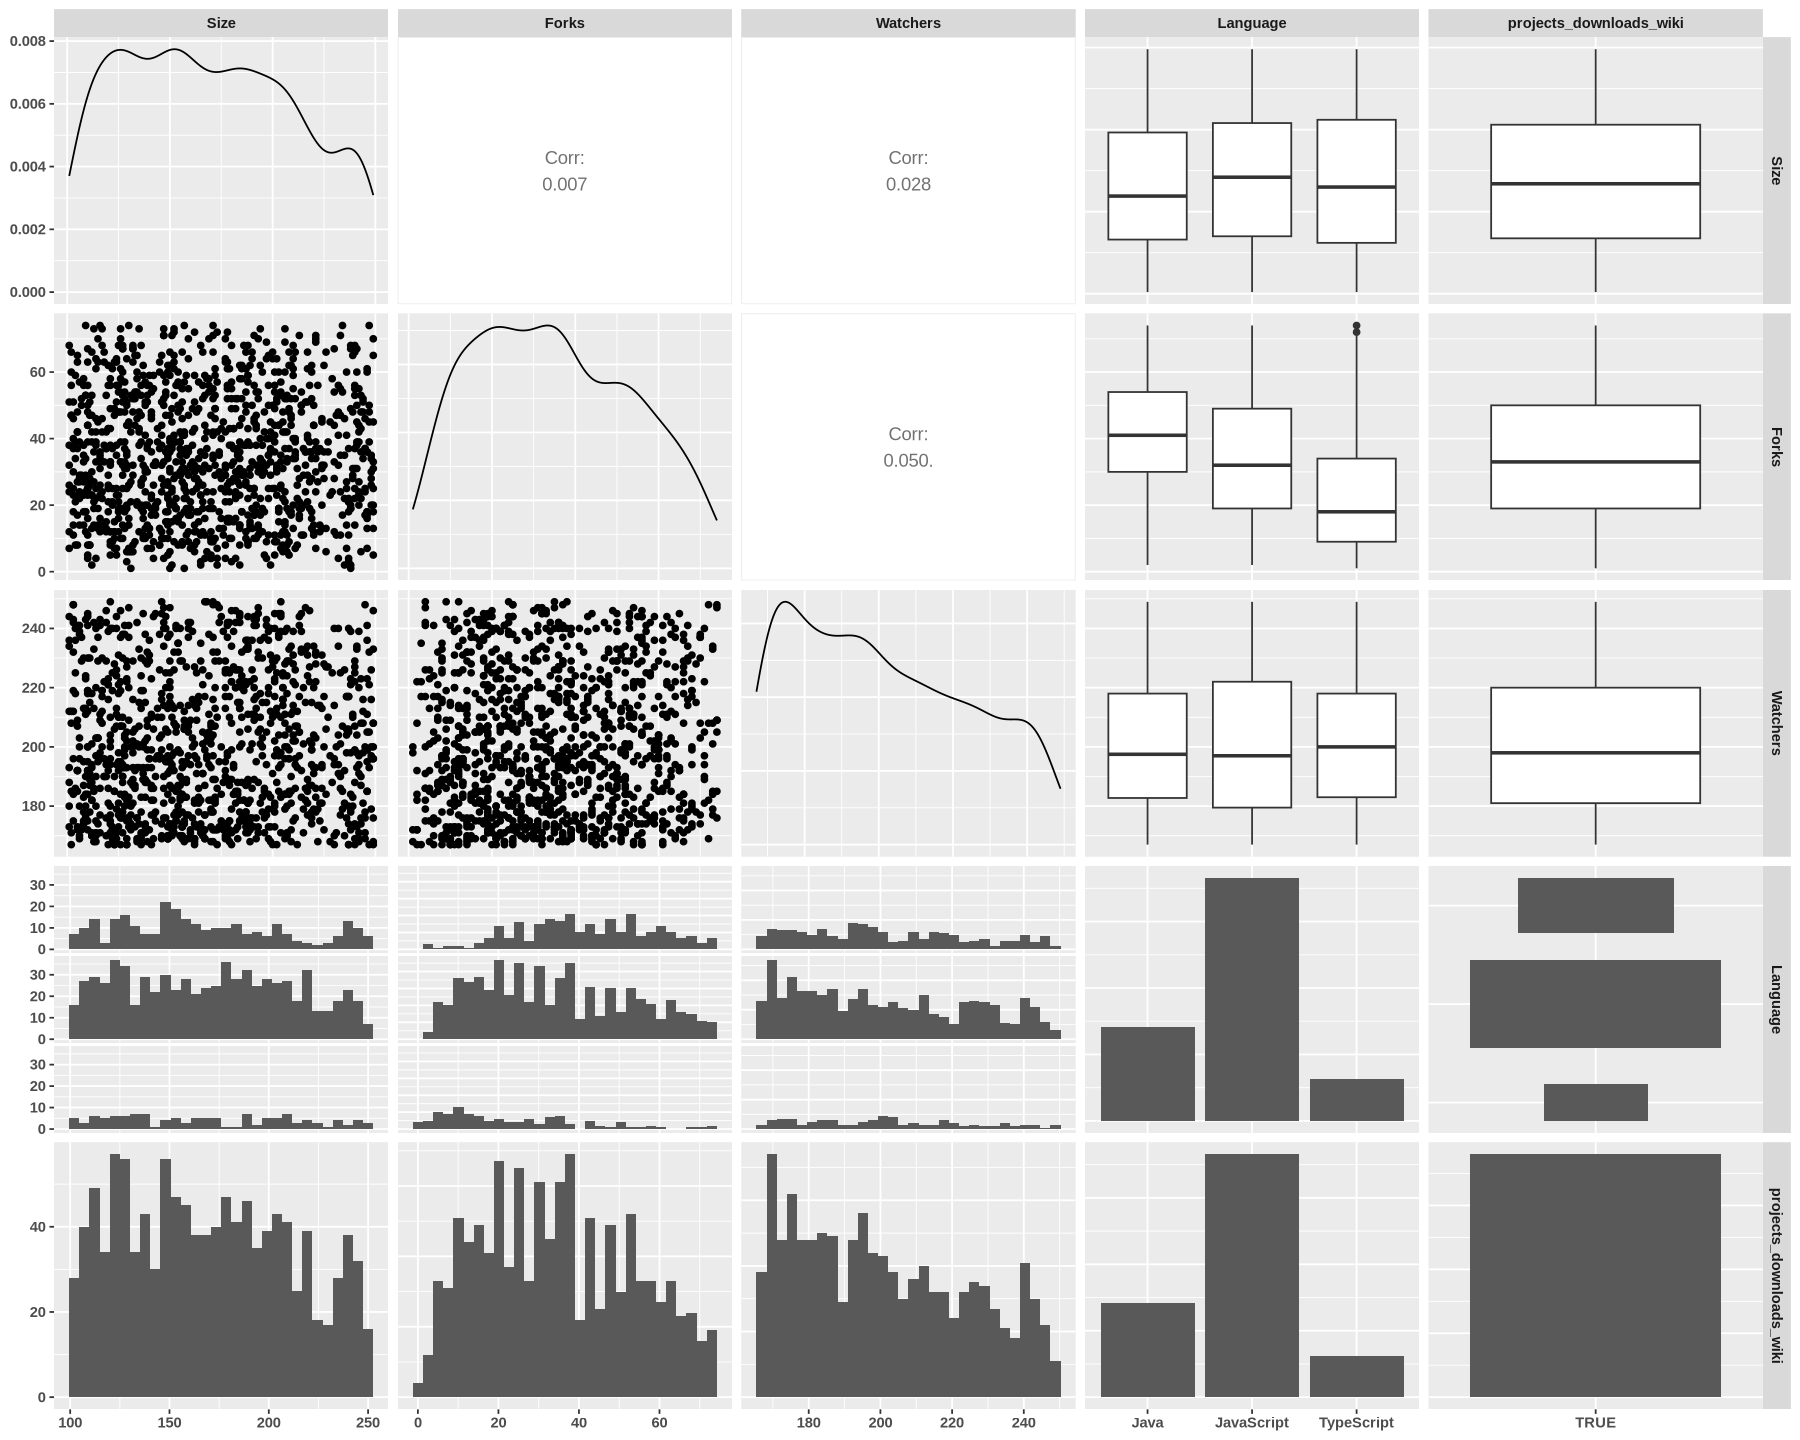

In [3]:
git_pair_plots <- tidy_git_data %>%
    select(-Stars) %>%
    ggpairs(progress = FALSE) +
    theme(
        text = element_text(face = "bold"),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

git_pair_plots

Creating a pairwise plot to visually see if any pairs of input variables seem to be highly correlated; a quick check for multicollinearity.

### Creating a Multiple Linear Regression Model

In [4]:
git_MLR_add <- lm(Stars ~ Size + Forks + Watchers + Language, data = tidy_git_data)

git_MLR_add_results <- tidy(git_MLR_add, conf.int = TRUE)

git_MLR_add_results

tidy_git_data$pred_MLR_int <- predict(git_MLR_add)

Warning message in summary.lm(x):
“essentially perfect fit: summary may be unreliable”
Warning message in summary.lm(object, ...):
“essentially perfect fit: summary may be unreliable”


term               estimate      std.error    statistic     p.value      
1 (Intercept)         2.612266e-14 4.789376e-16  5.454294e+01 2.665781e-319
2 Size                2.490727e-18 1.179435e-18  2.111796e+00  3.492225e-02
3 Forks               1.125875e-17 2.738385e-18  4.111455e+00  4.215235e-05
4 Watchers            1.000000e+00 2.092626e-18  4.778684e+17  0.000000e+00
5 LanguageJavaScript -1.734716e-16 1.178771e-16 -1.471631e+00  1.413981e-01
6 LanguageTypeScript -2.181385e-16 1.850272e-16 -1.178954e+00  2.386637e-01
  conf.low      conf.high   
1  2.518296e-14 2.706237e-14
2  1.766056e-19 4.804848e-18
3  5.885876e-18 1.663162e-17
4  1.000000e+00 1.000000e+00
5 -4.047533e-16 5.781016e-17
6 -5.811726e-16 1.448955e-16

After creating the model with 95% confidence intervals, we can analyze the estimated intercepts, slopes, difference in intercepts, and difference in slopes from this dataframe and get the proposed equation from our model.

### Exploring the Variance Inflation Factor

In [5]:
vif_git_MLR_add <- vif(git_MLR_add)
round(vif_git_MLR_add, 3)

Warning message in summary.lm(object, ...):
“essentially perfect fit: summary may be unreliable”


GVIF  Df GVIF^(1/(2*Df))
Size     1.002 1  1.001          
Forks    1.087 1  1.043          
Watchers 1.004 1  1.002          
Language 1.086 2  1.021

We can use the Variance Inflation Factor to check for *Multicollinearity* within the input variables.  Since the VIF's of the input variables are $\approx$ 1 and are relatively low, we can conclude that there is no multicollinearity within this tidied dataset.

### Creating Correlation Matrix

In [6]:
corr_matrix_git <- tidy_git_data |>
    select(-Stars, -Language, -projects_downloads_wiki) |>
    cor() |>
    as.data.frame() |>
    rownames_to_column("var1") |>
    pivot_longer(-var1, names_to = "var2", values_to = "corr")

corr_matrix_git

var1         var2         corr       
1  Size         Size         1.000000000
2  Size         Forks        0.006820379
3  Size         Watchers     0.028411033
4  Size         pred_MLR_int 0.028411033
5  Forks        Size         0.006820379
6  Forks        Forks        1.000000000
7  Forks        Watchers     0.049660109
8  Forks        pred_MLR_int 0.049660109
9  Watchers     Size         0.028411033
10 Watchers     Forks        0.049660109
11 Watchers     Watchers     1.000000000
12 Watchers     pred_MLR_int 1.000000000
13 pred_MLR_int Size         0.028411033
14 pred_MLR_int Forks        0.049660109
15 pred_MLR_int Watchers     1.000000000
16 pred_MLR_int pred_MLR_int 1.000000000

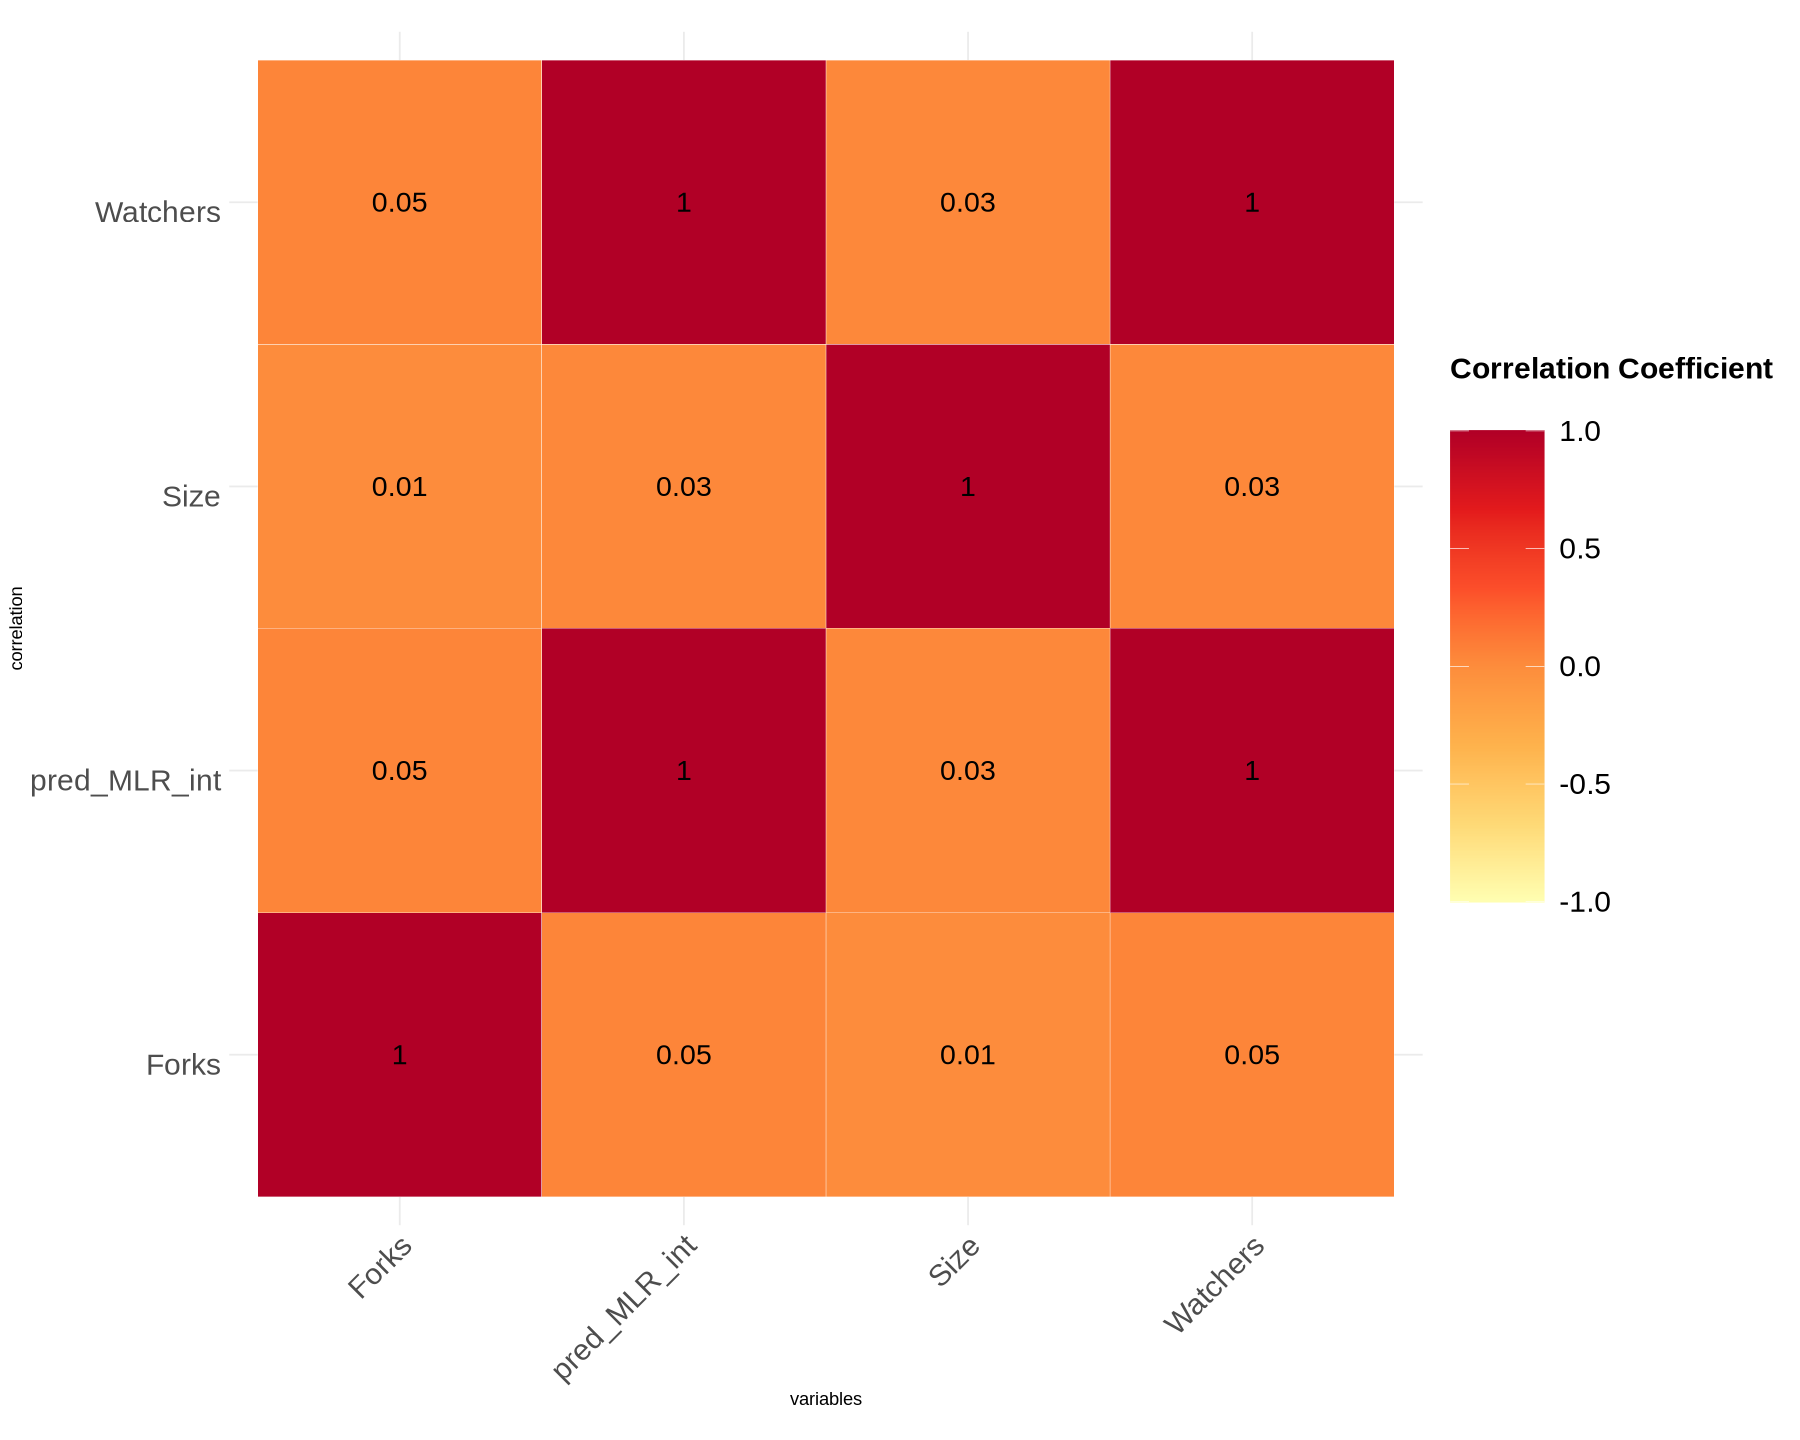

In [7]:
plot_corr_matrix_git <- corr_matrix_git |>
    ggplot(aes(x = var1, y = var2)) +
    geom_tile(aes(fill = corr), color = "white") +
    scale_fill_distiller("Correlation Coefficient \n",
                        palette = "YlOrRd",
                        direction = 1, limits = c(-1,1)
                        ) +
    labs(x = "variables", y = "correlation") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(
            angle = 45, vjust = 1,
            size = 18, hjust = 1
            ),
        axis.text.y = element_text(
            vjust = 1,
            size = 18, hjust = 1
            ),
        legend.title = element_text(size = 18, face = "bold"),
        legend.text = element_text(size = 18),
        legend.key.size = unit(2, "cm")
    ) +
    coord_fixed() +
    geom_text(aes(x = var1, y = var2, label = round(corr, 2)), color = "black", size = 6)

plot_corr_matrix_git

A correlation coefficient heatmap to give another visualization to multicollinearity.

### Creating Side-By-Side Scatter Plots to Visualize the Relationship

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


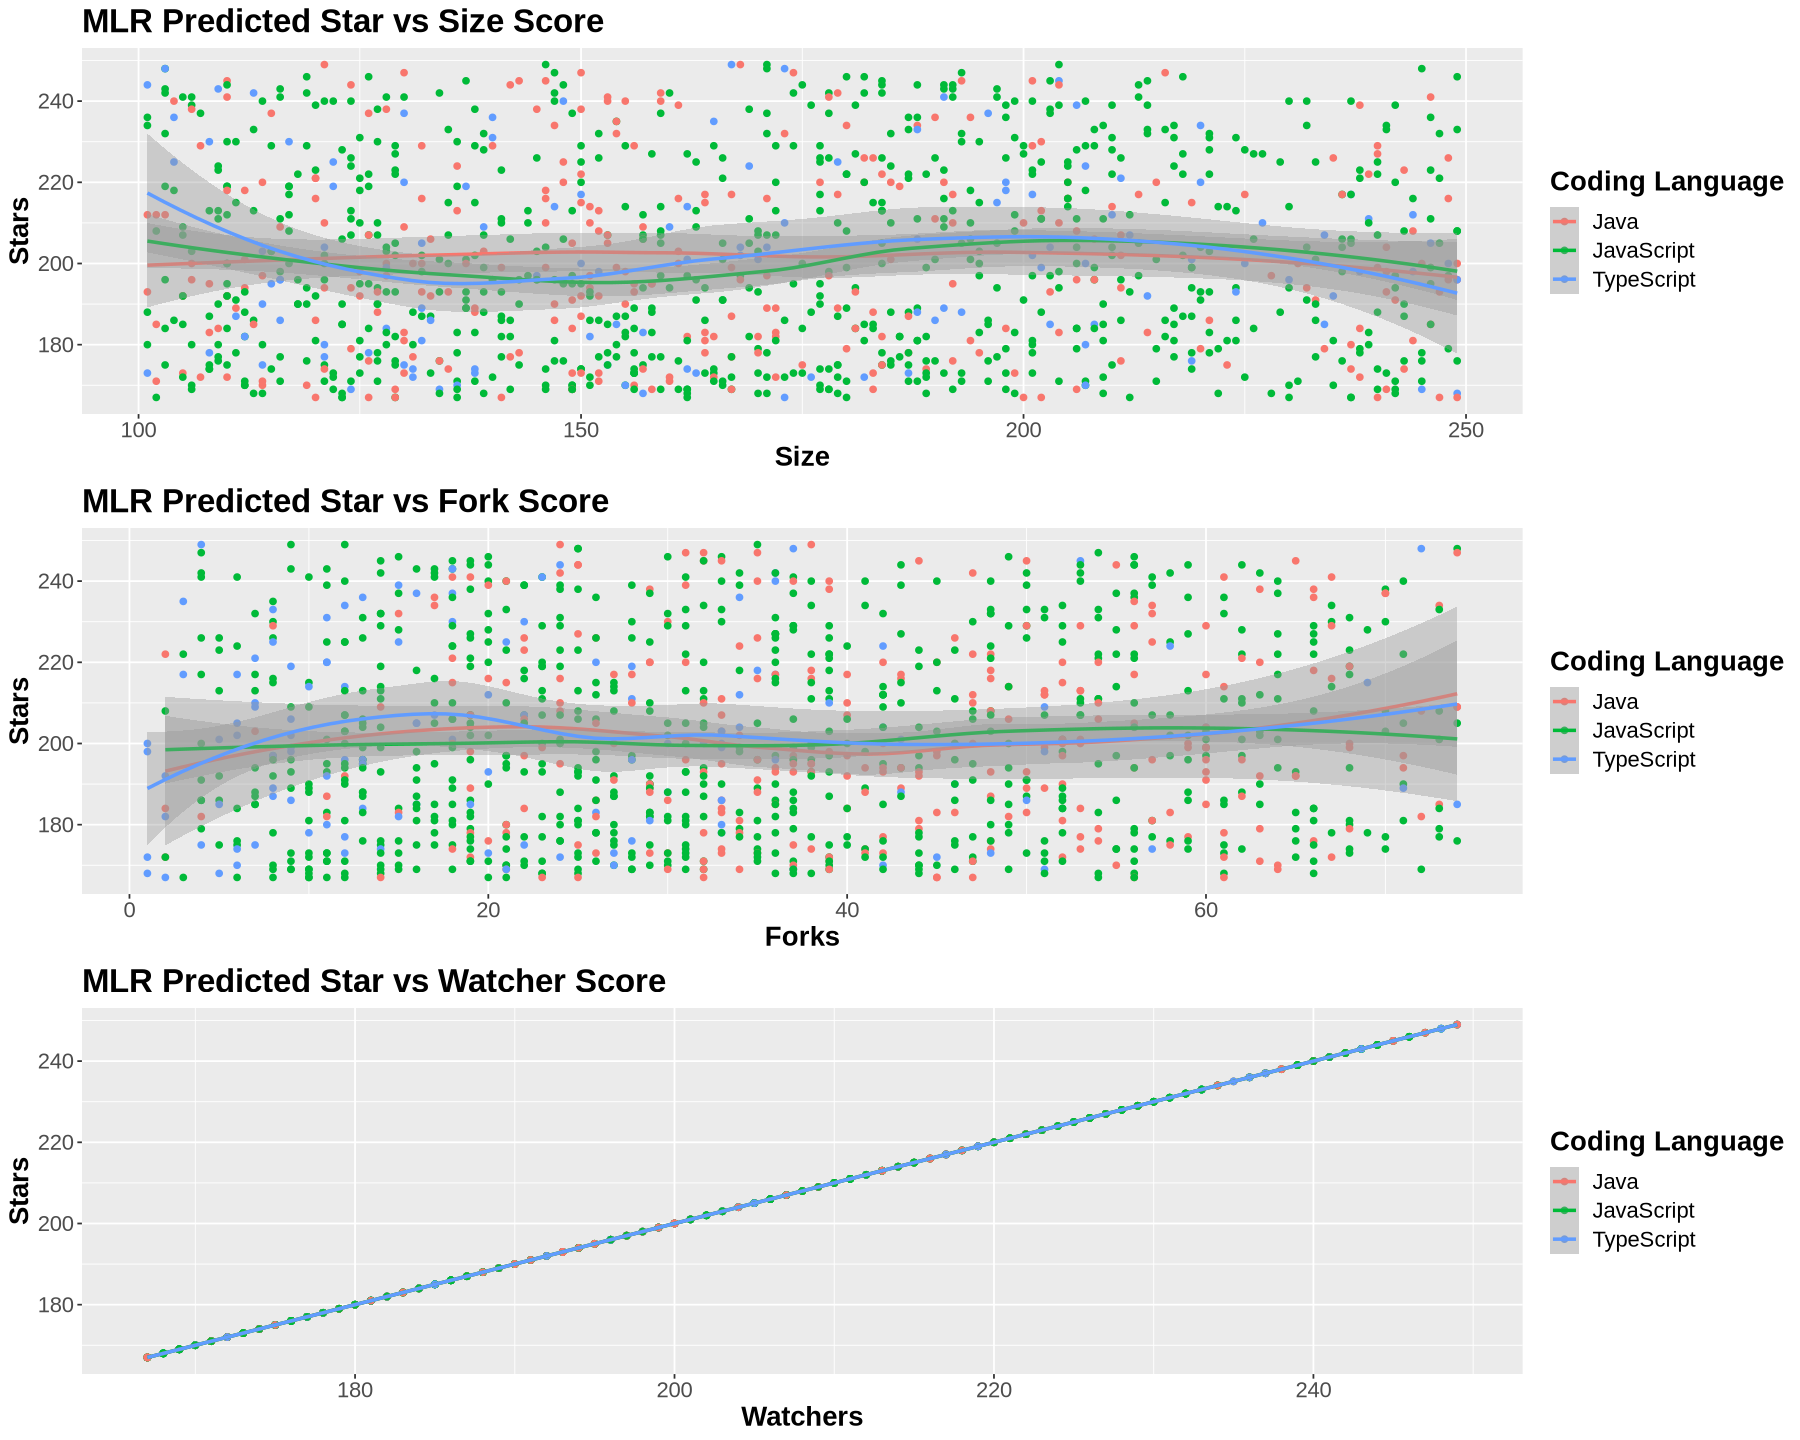

In [8]:
git_size_MLR_add_plot <- ggplot(tidy_git_data, aes(
    x = Size,
    y = Stars,
    color = Language,
    )) +
    geom_point() +
    geom_smooth(aes(y = pred_MLR_int), size = 1) +
    labs(
        title = "MLR Predicted Star vs Size Score",
        x = "Size",
        y = "Stars",
    ) +
    theme(
        text = element_text(size = 16.5),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
    ) +
    labs(color = "Coding Language")

git_forks_MLR_add_plot <- ggplot(tidy_git_data, aes(
    x = Forks,
    y = Stars,
    color = Language
    )) +
    geom_point() +
    geom_smooth(aes(y = pred_MLR_int), size = 1) +
    labs(
        title = "MLR Predicted Star vs Fork Score",
        x = "Forks",
        y = "Stars",
    ) +
    theme(
        text = element_text(size = 16.5),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
    ) +
    labs(color = "Coding Language") 

git_watchers_MLR_add_plot <- ggplot(tidy_git_data, aes(
    x = Watchers,
    y = Stars,
    color = Language
    )) +
    geom_point() +
    geom_smooth(aes(y = pred_MLR_int), size = 1) +
    labs(
        title = "MLR Predicted Star vs Watcher Score",
        x = "Watchers",
        y = "Stars",
    ) +
    theme(
        text = element_text(size = 16.5),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold"),
        legend.title = element_text(face = "bold"),
    ) +
    labs(color = "Coding Language") 

grid.arrange(git_size_MLR_add_plot, git_forks_MLR_add_plot, git_watchers_MLR_add_plot)

The plot of 3 different scatter plots.  Each showing the linear regression model for the Explanatory Variable `Stars` vs different numerical input variables `Size`, `Forks`, and `Watchers` with their respective Programming Language.  We can use these plots to get a visualization of the correlation between each variable to see if they show a rough positive/negative correlation.